In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"Breast Cancer METABRIC.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

# Data Pre-processing

In [ ]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      1092 non-null   object 
 1   Age at Diagnosis                1092 non-null   float64
 2   Type of Breast Surgery          1092 non-null   object 
 3   Cancer Type                     1092 non-null   object 
 4   Cancer Type Detailed            1092 non-null   object 
 5   Cellularity                     1092 non-null   object 
 6   Chemotherapy                    1092 non-null   object 
 7   Pam50 + Claudin-low subtype     1092 non-null   object 
 8   Cohort                          1092 non-null   float64
 9   ER status measured by IHC       1092 non-null   object 
 10  ER Status                       1092 non-null   object 
 11  Neoplasm Histologic Grade       1092 non-null   float64
 12  HER2 status measured by SNP6    1092 no

In [ ]:
print(df.head())

   Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
1     MB-0002             43.19      Breast Conserving  Breast Cancer   
4     MB-0008             76.97             Mastectomy  Breast Cancer   
5     MB-0010             78.77             Mastectomy  Breast Cancer   
10    MB-0028             86.41      Breast Conserving  Breast Cancer   
11    MB-0035             84.22             Mastectomy  Breast Cancer   

                         Cancer Type Detailed Cellularity Chemotherapy  \
1            Breast Invasive Ductal Carcinoma        High           No   
4   Breast Mixed Ductal and Lobular Carcinoma        High          Yes   
5            Breast Invasive Ductal Carcinoma    Moderate           No   
10           Breast Invasive Ductal Carcinoma    Moderate           No   
11          Breast Invasive Lobular Carcinoma        High           No   

   Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
1                         LumA     1.0     

## Removing redundant columns

In [ ]:
missing_idx = df[df['Tumor Other Histologic Subtype'].isna()].index
df.loc[missing_idx, 'Tumor Other Histologic Subtype'] = df.loc[missing_idx, 'Oncotree Code']

In [ ]:
df = df.drop(columns=['Patient ID', 'ER status measured by IHC',
                                        'HER2 status measured by SNP6','Sex',
                                         'Cancer Type Detailed',
                                         'Tumor Other Histologic Subtype','Cancer Type'])


In [ ]:
main_classes = ['IDC', 'MDLC', 'ILC', 'BRCA']
def merge_classes(x):
    if x in main_classes:
        return x
    else:
        return 'Other'
df['Oncotree Code_merged'] = df['Oncotree Code'].apply(merge_classes)
df= df.drop(columns=['Oncotree Code'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               1092 non-null   float64
 1   Type of Breast Surgery         1092 non-null   object 
 2   Cellularity                    1092 non-null   object 
 3   Chemotherapy                   1092 non-null   object 
 4   Pam50 + Claudin-low subtype    1092 non-null   object 
 5   Cohort                         1092 non-null   float64
 6   ER Status                      1092 non-null   object 
 7   Neoplasm Histologic Grade      1092 non-null   float64
 8   HER2 Status                    1092 non-null   object 
 9   Hormone Therapy                1092 non-null   object 
 10  Inferred Menopausal State      1092 non-null   object 
 11  Integrative Cluster            1092 non-null   object 
 12  Primary Tumor Laterality       1092 non-null   object

## Data Encoding (categorical to numerical)

In [ ]:
from sklearn.preprocessing import LabelEncoder

common_cate = ['Type of Breast Surgery', 'Pam50 + Claudin-low subtype',
               'Integrative Cluster', '3-Gene classifier subtype',
               'Primary Tumor Laterality', 'Oncotree Code_merged',
               'Overall Survival Status', 'Relapse Free Status', "Patient's Vital Status"]

encoders = {}
for col in common_cate:
    le = LabelEncoder()
    mask = df[col].notnull()
    df.loc[mask, col] = le.fit_transform(df.loc[mask, col])
    df[col] = df[col].astype('float64')
    encoders[col] = le

In [ ]:
# Cellularity
df['Cellularity'] = df['Cellularity'].map({
    'High': 2, 'Moderate': 1, 'Low': 0
}).astype("Float64")

# Chemotherapy, Hormone Therapy, Radio Therapy
for col in ['Chemotherapy', 'Hormone Therapy', 'Radio Therapy']:
    df[col] = df[col].map({
        'Yes': 1, 'No': 0
    }).astype("Float64")
# ER, HER2, PR Status
for col in ['ER Status', 'HER2 Status', 'PR Status']:
    df[col] = df[col].map({
        'Positive': 1, 'Negative': 0
    }).astype("Float64")

#Inferred Menopausal State
df['Inferred Menopausal State'] = df['Inferred Menopausal State'].map({
    'Pre': 0, 'Post': 1}).astype("Float64")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               1092 non-null   float64
 1   Type of Breast Surgery         1092 non-null   float64
 2   Cellularity                    1092 non-null   Float64
 3   Chemotherapy                   1092 non-null   Float64
 4   Pam50 + Claudin-low subtype    1092 non-null   float64
 5   Cohort                         1092 non-null   float64
 6   ER Status                      1092 non-null   Float64
 7   Neoplasm Histologic Grade      1092 non-null   float64
 8   HER2 Status                    1092 non-null   Float64
 9   Hormone Therapy                1092 non-null   Float64
 10  Inferred Menopausal State      1092 non-null   Float64
 11  Integrative Cluster            1092 non-null   float64
 12  Primary Tumor Laterality       1092 non-null   float6

In [ ]:
y = df['Relapse Free Status'].values
x = df.drop(columns=['Relapse Free Status']).values
print(x)

[[43.19 0.0 2.0 ... 1.0 2.0 0.0]
 [76.97 1.0 2.0 ... 2.0 0.0 2.0]
 [78.77 1.0 1.0 ... 4.0 0.0 0.0]
 ...
 [75.62 1.0 2.0 ... 1.0 1.0 0.0]
 [52.84 0.0 2.0 ... 2.0 2.0 2.0]
 [63.2 0.0 2.0 ... 2.0 2.0 3.0]]


In [ ]:
print(y)

[0. 1. 1. ... 0. 0. 0.]


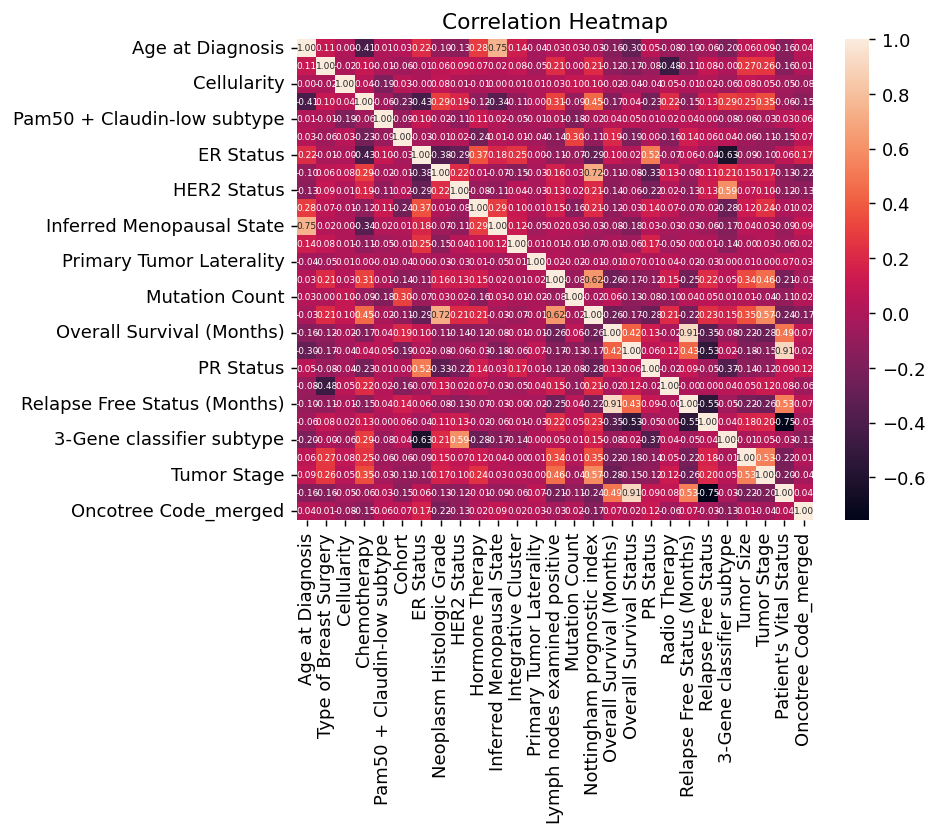

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True,
fmt= '.2f', annot_kws={"fontsize": 5})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4,
random_state=0)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[41.81 1.0 2.0 ... 2.0 0.0 0.0]
 [48.11 1.0 0.0 ... 2.0 2.0 0.0]
 [38.16 1.0 0.0 ... 3.0 0.0 0.0]
 ...
 [62.11 1.0 2.0 ... 2.0 0.0 0.0]
 [54.6 0.0 2.0 ... 2.0 2.0 0.0]
 [43.77 1.0 2.0 ... 1.0 2.0 0.0]]
[[70.59 0.0 2.0 ... 2.0 1.0 1.0]
 [76.37 1.0 0.0 ... 1.0 1.0 0.0]
 [75.27 1.0 2.0 ... 2.0 0.0 1.0]
 ...
 [45.39 1.0 1.0 ... 2.0 0.0 0.0]
 [57.96 0.0 2.0 ... 1.0 0.0 0.0]
 [50.48 1.0 2.0 ... 2.0 2.0 0.0]]
[1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[0.24496591 1.         1.         ... 0.33333333 0.         0.        ]
 [0.34485492 1.         0.         ... 0.33333333 1.         0.        ]
 [0.18709371 1.         0.         ... 0.66666667 0.         0.        ]
 ...
 [0.56683051 1.         1.         ... 0.33333333 0.         0.        ]
 [0.44775646 0.         1.         ... 0.33333333 1.         0.        ]
 [0.27604249 1.         1.         ... 0.         1.         0.        ]]
[[0.70128429 0.         1.         ... 0.33333333 0.5        0.33333333]
 [0.79292849 1.         0.         ... 0.         0.5        0.        ]
 [0.77548755 1.         1.         ... 0.33333333 0.         0.33333333]
 ...
 [0.30172824 1.         0.5        ... 0.33333333 0.         0.        ]
 [0.5010306  0.         1.         ... 0.         0.         0.        ]
 [0.38243222 1.         1.         ... 0.33333333 1.         0.        ]]


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_lgr_train_pred = lgr.predict(x_train)
y_lgr_test_pred = lgr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lgr_train_mse = mean_squared_error(y_train, y_lgr_train_pred)
lgr_train_r2 = r2_score(y_train, y_lgr_train_pred)

lgr_test_mse = mean_squared_error(y_test, y_lgr_test_pred)
lgr_test_r2 = r2_score(y_test, y_lgr_test_pred)

In [ ]:
print('LGR MSE (Train): ',lgr_train_mse)
print('LGR R2 (Train): ',lgr_train_r2)
print('LGR MSE (Test): ',lgr_test_mse)
print('LGR R2 (Test): ',lgr_test_r2)

LGR MSE (Train):  0.0549618320610687
LGR R2 (Train):  0.7723850341712035
LGR MSE (Test):  0.07322654462242563
LGR R2 (Test):  0.7012731778176536


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_lgr_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_lgr_test_pred, average='weighted')
recall = recall_score(y_test,  y_lgr_test_pred, average='weighted')
precision = precision_score(y_test,  y_lgr_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9267734553775744
F1-score: 0.9255781822490293
Recall: 0.9267734553775744
Precision: 0.9351124213132243


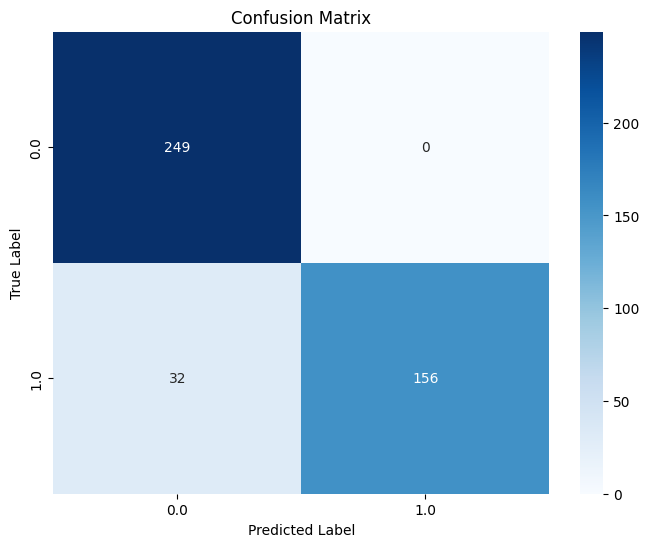

In [ ]:
cm = confusion_matrix(y_test, y_lgr_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lgr.classes_, yticklabels=lgr.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

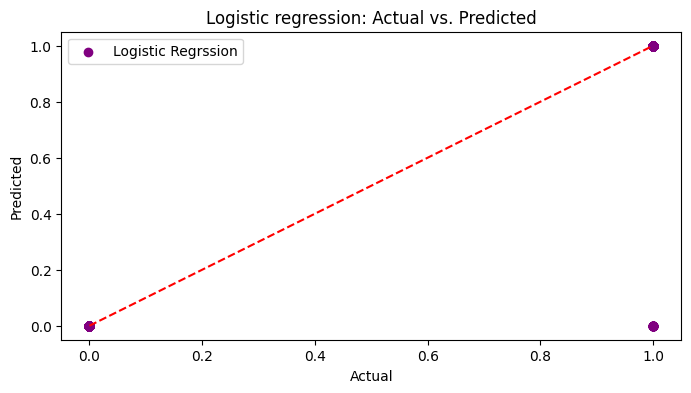

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_lgr_test_pred, color='purple', label='Logistic Regrssion')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Logistic regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
import numpy as np
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_test_pred = np.round(y_rf_test_pred)

In [ ]:
print(y_rf_test_pred)

[0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_rf_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_rf_test_pred, average='weighted')
recall = recall_score(y_test,  y_rf_test_pred, average='weighted')
precision = precision_score(y_test,  y_rf_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9290617848970252
F1-score: 0.9279532355998897
Recall: 0.9290617848970252
Precision: 0.9369156587119973


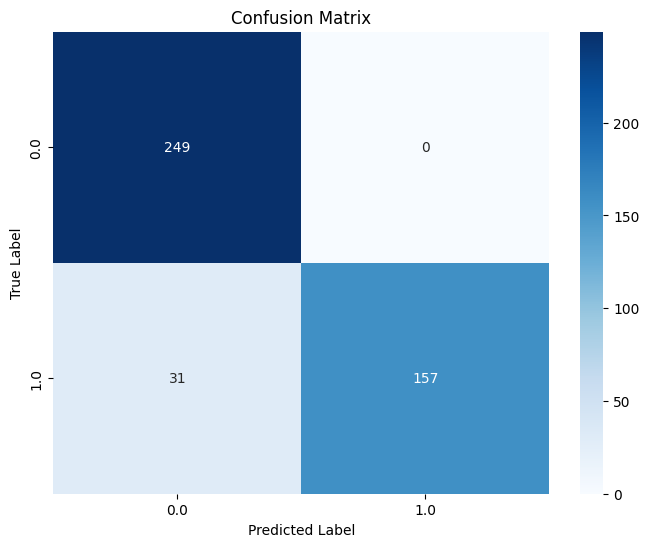

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_rf_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier( n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:59:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_xgb_train_pred = xgb.predict(x_train)
y_xgb_test_pred = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_xgb_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_xgb_test_pred, average='weighted')
recall = recall_score(y_test,  y_xgb_test_pred, average='weighted')
precision = precision_score(y_test,  y_xgb_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9725400457665904
F1-score: 0.9724104674434464
Recall: 0.9725400457665904
Precision: 0.9738025723980116


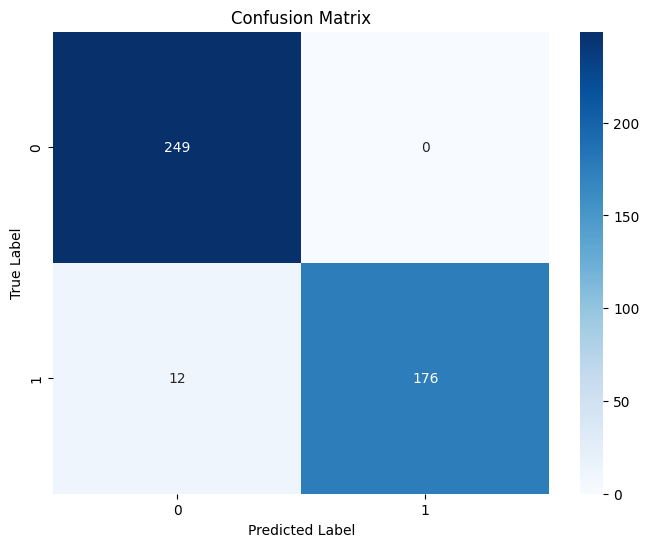

In [ ]:
cm = confusion_matrix(y_test, y_xgb_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_dtc_train_pred = dtc.predict(x_train)
y_dtc_test_pred = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_dtc_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_dtc_test_pred, average='weighted')
recall = recall_score(y_test,  y_dtc_test_pred, average='weighted')
precision = precision_score(y_test,  y_dtc_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9267734553775744
F1-score: 0.9269384641728545
Recall: 0.9267734553775744
Precision: 0.9277299457245987


In [ ]:
import seaborn as sns

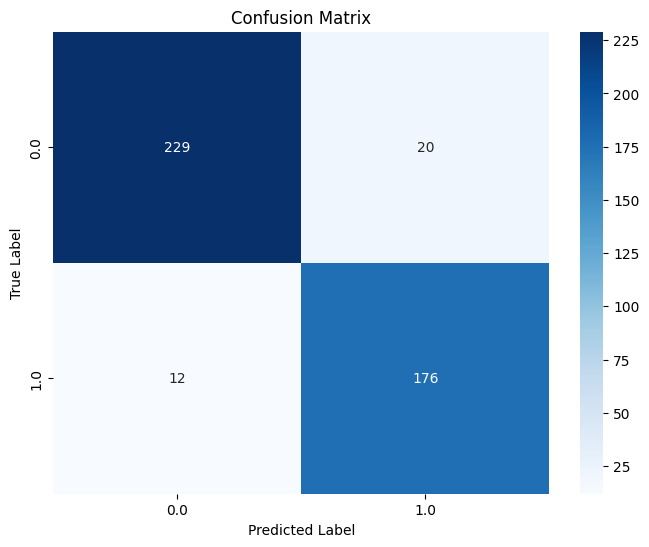

In [ ]:
cm = confusion_matrix(y_test, y_dtc_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_svc_train_pred = svc.predict(x_train)
y_svc_test_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_svc_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_svc_test_pred, average='weighted')
recall = recall_score(y_test,  y_svc_test_pred, average='weighted')
precision = precision_score(y_test,  y_svc_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9176201372997712
F1-score: 0.9160356997554375
Recall: 0.9176201372997712
Precision: 0.9280260146934842


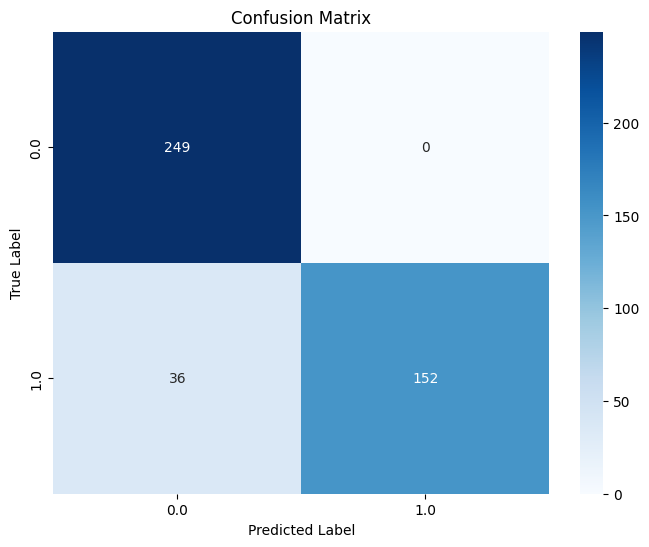

In [ ]:
cm = confusion_matrix(y_test, y_svc_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LIGHT GBM CLASSIFIER

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.classes_ = np.array([0, 1])
num_classes = len(le.classes_)
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    verbose=-1,
)

In [ ]:
lgbm_model.fit(x_train, y_train)

LGBMClassifier(objective='binary', random_state=42, verbose=-1)

In [ ]:
y_pred_lgbm = lgbm_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred_lgbm, average='weighted')
recall = recall_score(y_test,  y_pred_lgbm, average='weighted')
precision = precision_score(y_test,  y_pred_lgbm, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9816933638443935
F1-score: 0.9816390951601379
Recall: 0.9816933638443935
Precision: 0.9822632202227782


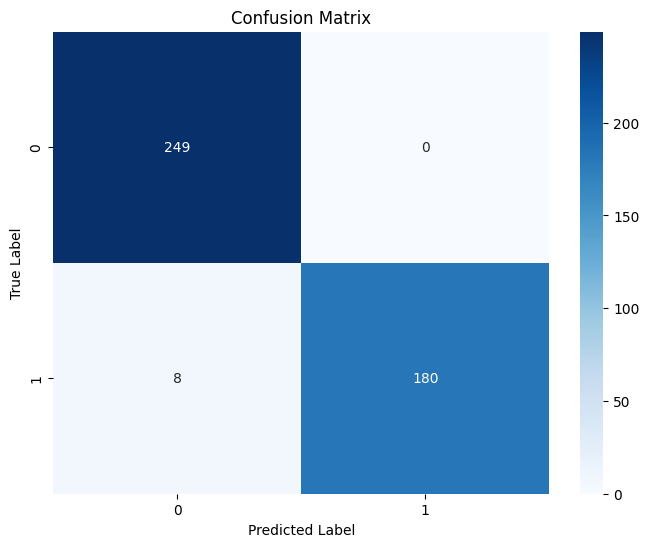

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipython-input-2584501076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=model_accuracies, palette='viridis')


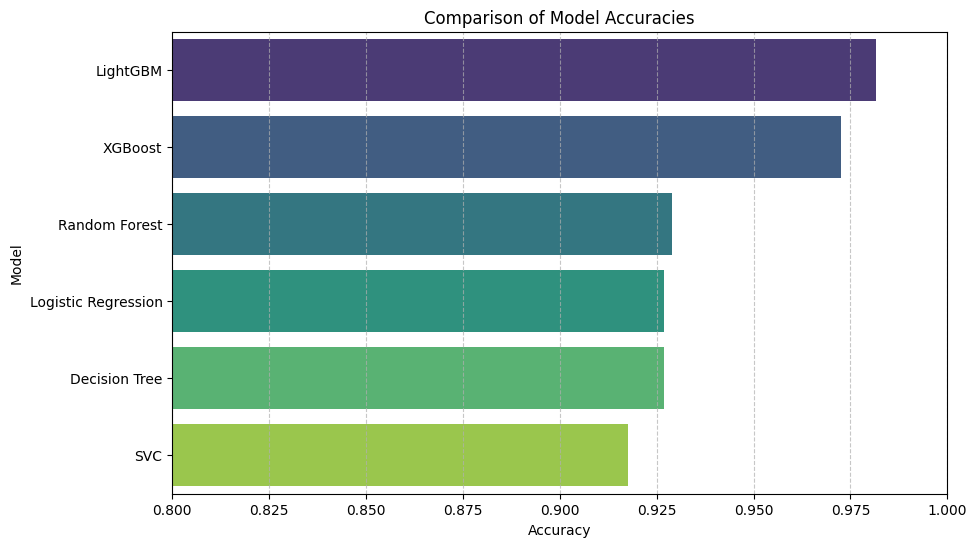

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

lgr_accuracy = accuracy_score(y_test, y_lgr_test_pred)
rf_accuracy = accuracy_score(y_test, y_rf_test_pred)
xgb_accuracy = accuracy_score(y_test, y_xgb_test_pred)
dtc_accuracy = accuracy_score(y_test, y_dtc_test_pred)
svc_accuracy = accuracy_score(y_test, y_svc_test_pred)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)

model_accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'SVC', 'LightGBM'],
    'Accuracy': [lgr_accuracy, rf_accuracy, xgb_accuracy, dtc_accuracy, svc_accuracy, lgbm_accuracy]
})

model_accuracies = model_accuracies.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()